In [1]:
import pandas as pd
pd.__version__

'1.0.1'

In [5]:
data = pd.read_csv('wine.csv')

In [6]:
data.shape

(177, 14)

In [9]:
Inputs = data.iloc[:,0:13]
#Standard Scaler is mainly used to standardize the data so that data measured at different scales do not contribute equally to the fit of the model and the learning function of the model and could end up creating a bias. 
from sklearn.preprocessing import StandardScaler

x1 = StandardScaler().fit_transform(Inputs)

In [12]:
statistics = StandardScaler().fit(Inputs)
x2 = statistics.transform(Inputs)
print(x2.mean(axis=0)) # print the mean value of each feature after removing the mean
print(x2.std(axis=0)) # print the standard deviation value of each feature after removing the mean

[-8.02873148e-17 -5.21867546e-16  2.81005602e-16 -3.81364745e-16
 -2.40861944e-16 -8.02873148e-17 -2.81005602e-16  1.60574630e-16
 -6.02154861e-16 -4.01436574e-17  1.90682373e-16  6.02154861e-16
  7.22585833e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
from sklearn.decomposition import PCA # import PCA

pca = PCA( ) # initialising a PCA instance.
proj_wine = pca.fit_transform(x2) # The eigen-decomposition is done by using the fit() function; projections of the data in the PCA space is obtained using the transform() function. 
print(proj_wine.shape)

(177, 13)


In [36]:
#methods fit() and transform() can also be used separately for PCA().
eigen_decom = PCA().fit(x2)
proj_wine = eigen_decom.transform(x2)

[5.20328752 2.19012075 1.43406824 0.90249759 0.85896268 0.67606811
 0.55647027 0.35276013 0.2644878  0.25882918 0.17069927 0.13592734
 0.06968476]
[0.39799157 0.16751901 0.1096897  0.06903067 0.06570075 0.05171142
 0.04256357 0.02698209 0.02023027 0.01979745 0.01305653 0.01039688
 0.00533008]


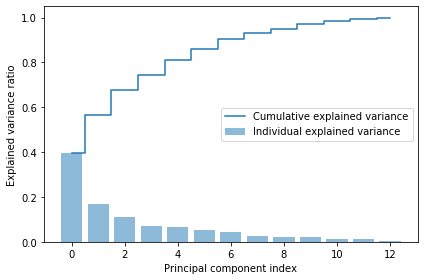

In [40]:
print(pca.explained_variance_)

#explained_variance_ratio is used to get the ration of variance (eigenvalue / total eigenvalues)

print(pca.explained_variance_ratio_) 

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [45]:

#measure of how much of the total variance in the original dataset is explained by each principal component. The explained variance of a principal component is equal to the eigenvalue associated with that component.
var = np.sum(pca.explained_variance_[0:2])
print(var)
var_percentage = np.sum(pca.explained_variance_ratio_[0:2])*100
print(var_percentage,'%')

7.393408265589871
56.55105844171301 %


Text(0, 0.5, 'The explained varaince')

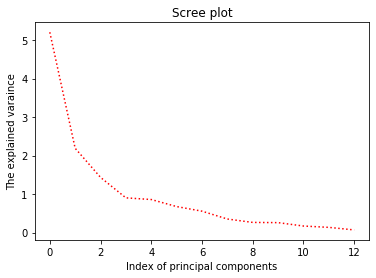

In [46]:
import matplotlib.pyplot as plt
figure = plt.figure()
ax = plt.gca()
plt.plot(pca.explained_variance_, color='red', linestyle='dotted')
ax.set_title("Scree plot")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("The explained varaince")

Text(0, 0.5, 'The second principle component')

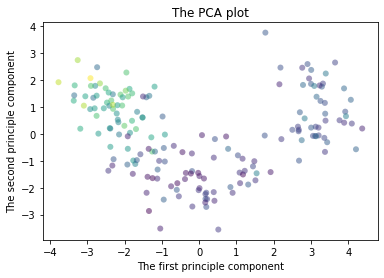

In [47]:
Labels = data.iloc[:,13]
Labels

figure = plt.figure()
ax = plt.gca()
plt.scatter(proj_wine[:,0],proj_wine[:,1], c=Labels, edgecolor='none', alpha=0.5)
ax.set_title("The PCA plot")
ax.set_xlabel("The first principle component")
ax.set_ylabel("The second principle component")

Text(0, 0.5, 'The explained variance ratio')

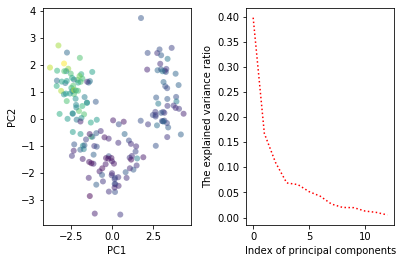

In [48]:
#### import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=2.50) # set subplot spacing

plt.subplot(121) #rows, columns, index
dots_trn=plt.scatter(proj_wine[:,0],proj_wine[:,1], c=Labels, edgecolor='none', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
classes=['C1', 'C2', 'C3']

"""plt.legend(handles=dots_trn.legend_elements()[0], labels=classes)"""

plt.subplot(122) #rows, columns, index
plt.plot(pca.explained_variance_ratio_, color='red', linestyle='dotted')
plt.xlabel("Index of principal components")
plt.ylabel("The explained variance ratio")

In [49]:
figure.savefig('pca_wine.png')

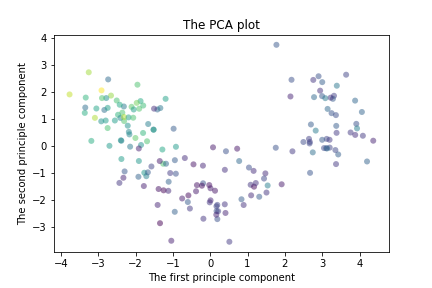

In [50]:
from IPython.display import Image
Image('pca_wine.png')

In [51]:
print(proj_wine[:,0])

[-2.37934546 -2.46980672 -3.25443802 -1.41488065 -2.6579181  -2.30682722
 -1.90310355 -2.5545495  -2.80069399 -3.08929269 -1.69256987 -2.00398348
 -3.36063721 -3.76859473 -2.10696724 -1.94969837 -1.86653079 -2.91211698
 -2.31331935 -3.34748672 -1.51926702 -2.69989655 -1.91132703 -2.14577236
 -1.3361777  -1.79888058 -1.25937602 -2.4074052  -2.39440245 -2.35488093
 -2.30855732 -1.8533192  -1.7946989  -1.51613582 -2.16461841 -1.66222383
 -1.28151852 -1.76599686 -2.73398614 -2.83619463 -0.91827547 -3.05001619
 -0.9808396  -2.38055976 -1.19542984 -2.74729911 -2.91907579 -2.05050486
 -2.50517228 -3.18460773 -2.74868215 -3.33499277 -1.96878354 -2.18868593
 -2.42447719 -2.78552612 -2.06271904 -2.89961842  0.51296554  1.31348923
  1.47779997 -0.19121296 -2.32601889  0.12872895 -0.94687012 -2.43306321
 -0.54433638  0.77559523 -1.92352608  1.53854476 -1.91307128  0.39203377
 -2.20958142 -1.71183675  0.4092669  -0.75170277  1.08316033 -1.18385686
 -0.6801008  -1.3449751  -1.11356296  0.16968085  2

In [52]:
print(proj_wine[:,1])

[-4.86517824e-01  1.15254781e+00  2.72693455e+00  1.34892282e+00
  1.86443277e+00  9.21367111e-01  1.37669212e+00  9.40641517e-01
  9.39579806e-01  1.03940607e+00  1.71466476e-01  2.92954485e-01
  1.22359108e+00  1.90704382e+00  1.44916109e+00  2.26736172e+00
  1.66097263e+00  2.05704436e+00  1.46035728e+00  1.42139785e+00
  6.04818830e-01  2.72009439e-03 -5.59828409e-01 -2.86276217e-02
  1.40290728e+00  4.79076359e-01 -6.61388427e-01  1.03657452e+00
  2.05703702e-01  1.23216047e+00  1.06943868e+00  3.35413486e-02
  1.49518785e+00  5.97456400e-01  4.25010914e-01  8.10731584e-01
 -1.34524245e-01 -9.94514895e-01  2.46315492e+00  1.33168770e+00
 -3.24598448e-02  1.38561860e+00  6.37139234e-01  1.91303030e-01
  1.74400594e+00  1.40935626e+00  9.10328937e-01  1.34845097e+00
  1.68201204e+00  1.85104921e-01  6.61678244e-01  1.79017032e+00
  1.59430252e+00  1.05635633e+00  1.52509866e+00  1.77316186e+00
  1.04402688e+00  1.77169625e+00 -3.55180603e+00 -1.88434298e+00
 -1.01931966e+00 -1.38542